In [65]:
# Alumna: Romero Jiménez Sofía Cristal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.colors import LinearSegmentedColormap

In [66]:
# Parámetros del modelo
lambda_llegadas = 10  # Llegadas promedio de clientes por hora (Poisson)
tiempo_servicio_promedio = 15  # Tiempo promedio de servicio en minutos (Exponencial)
lambda_servicio = 1 / tiempo_servicio_promedio  # Tasa para la distribución exponencial

# Generar llegadas de clientes usando la distribución Poisson (transformada inversa)
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio usando la distribución Exponencial (transformada inversa)
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

# Simulación de 8 horas en la tienda departamental
num_horas = 8
num_simulaciones = 100  # Número de simulaciones
llegadas_simuladas = []
servicios_simulados = []

# Simulamos para cada hora
for _ in range(num_horas):
    # Generamos un número de clientes por hora (Poisson)
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)

    # Generamos los tiempos de servicio para cada cliente (Exponencial)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

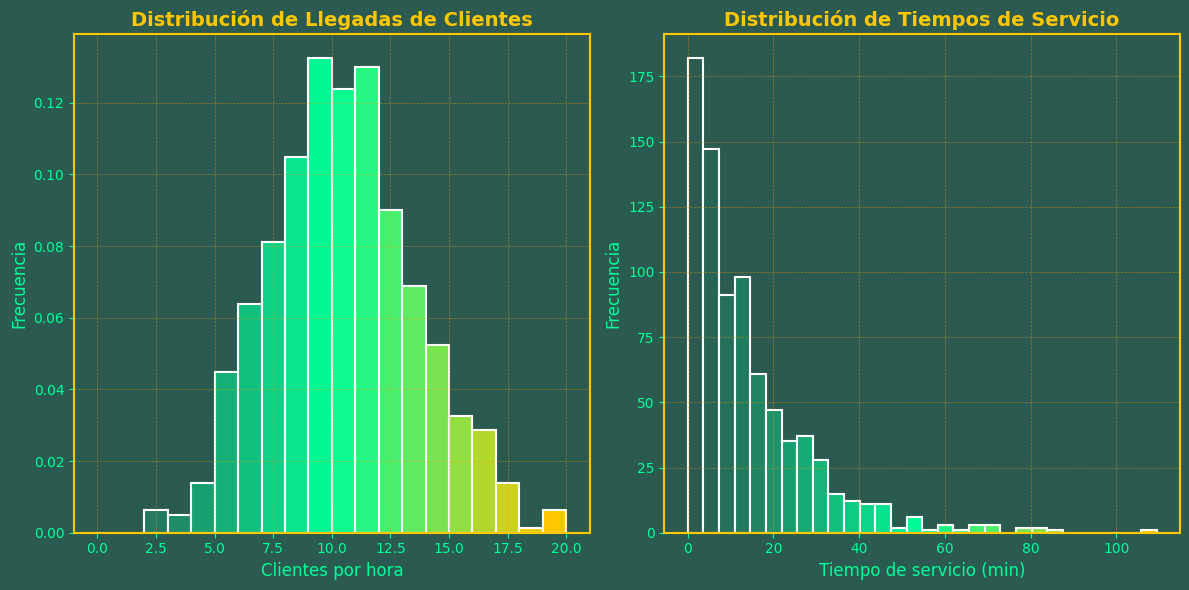

In [69]:
# Diseño de la gráfica
plt.figure(figsize=(12, 6))

# Paleta de colores inspirada en la imagen
azul_dark = '#2b5a51'
verde_neon = '#00FF99'
dorado_brillante = '#FFC700'
naranja_suave = '#FF9900'
blanco = '#FFFFFF'

# Colormap personalizado
colors = [azul_dark, verde_neon, dorado_brillante]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=100)

# ----- Gráfica de Llegadas -----
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1),
                            edgecolor=blanco, linewidth=1.5, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

plt.title("Distribución de Llegadas de Clientes", fontsize=14, color=dorado_brillante, fontweight='bold')
plt.xlabel("Clientes por hora", fontsize=12, color=verde_neon)
plt.ylabel("Frecuencia", fontsize=12, color=verde_neon)
plt.tick_params(colors=verde_neon)
plt.gca().set_facecolor(azul_dark)
plt.gcf().set_facecolor(azul_dark)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(dorado_brillante)
    spine.set_linewidth(1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color=naranja_suave, alpha=0.5)

# ----- Gráfica de Tiempos de Servicio -----
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(servicios_simulados, bins=30, edgecolor=blanco, linewidth=1.5)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

plt.title("Distribución de Tiempos de Servicio", fontsize=14, color=dorado_brillante, fontweight='bold')
plt.xlabel("Tiempo de servicio (min)", fontsize=12, color=verde_neon)
plt.ylabel("Frecuencia", fontsize=12, color=verde_neon)
plt.tick_params(colors=verde_neon)
plt.gca().set_facecolor(azul_dark)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(dorado_brillante)
    spine.set_linewidth(1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color=naranja_suave, alpha=0.5)

plt.tight_layout()
plt.show()